# Визуализация

#  Материалы

[Дашборд](https://public.tableau.com/app/profile/lesia.kiseleva/viz/Book1_16527717125130/Dashboard1)

[Презентация](https://disk.yandex.ru/i/NLmXDCnkBThEvQ)


## Описание проекта
Вы работаете аналитиком в Яндекс.Дзене. Почти всё ваше время занимает анализ пользовательского взаимодействия с карточками статей.
Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».

Каждую неделю начинающие менеджеры Денис и Валерия задают вам одни и те же вопросы:
Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
Как много карточек генерируют источники с разными темами?
Как соотносятся темы карточек и темы источников?
На шестую неделю работы вы решаете, что процесс пора автоматизировать. Для Дениса и Валерии нужно сделать дашборд.
Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет разработан для вас дата-инженерами.

## Краткое ТЗ:
* 		Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
* 		Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
* 		Кто будет основным пользователем дашборда: менеджеры по анализу контента;
* 		Состав данных для дашборда:
    * 		История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    * 		Разбивка событий по темам источников;
    * 		Таблица соответствия тем источников темам карточек;
* 		По каким параметрам данные должны группироваться:
    * 		Дата и время;
    * 		Тема карточки;
    * 		Тема источника;
    * 		Возрастная группа;
* 		Характер данных:
    * 		История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    * 		Разбивка событий по темам источников — относительные величины (% событий);
    * 		Соответствия тем источников темам карточек - абсолютные величины;
* 		Важность: все графики имеют равную важность;
* 		Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);
* 		База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;
* 		Частота обновления данных: один раз в сутки, в полночь по UTC;
* 		Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):


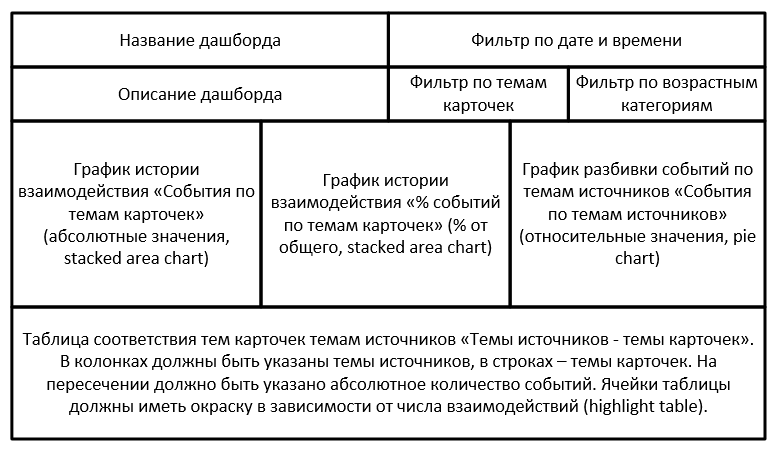

In [26]:
from IPython.display import Image
Image("./plan.png")

### Шаг №1. Загрузите данные и подготовьте их к анализу
Для создания дашборда выполните вот эти шаги:
* Скачайте файл https://storage.yandexcloud.net/cloud-certs/CA.pem в папку с файлом .ipynb, в котором вы будете работать с базой
* Создайте коннекцию к базе

Путь к файлу: /datasets/rest_data.csv.
###  Шаг №2. Анализ данных
В Юпитере, напишите код для выгрузки данных из таблицы dash_visits в файл dash_visits.csv;
В Tableau Public на основе файла dash_visits.csv сформируйте дашборд в соответствии с макетом;
Опубликуйте дашборд на сайте Tableau Public. Убедитесь, что он доступен для всего интернета - для этого можно открыть дашборд в нескольких браузерах. Если дашборд не будет доступен всему интернету, ревьюер не сможет его проверить.

###  Шаг №4. Ответьте на вопросы менеджеров, используя дашборд:
* Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
* Как много карточек генерируют источники с разными темами?
* Как соотносятся темы карточек и темы источников?
###  Шаг №4. Подготовка презентации
Подготовьте небольшую презентацию с отчётом — ответы на вопросы и графики.
Приложите ссылку на презентацию в markdown-ячейке в формате:

        Презентация: <ссылка на облачное хранилище с презентацией> 

Следуйте принципам оформления из темы «Подготовка презентации».
*Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.*
###  Описание данных
Таблица rest_data:
* 		id — идентификатор объекта;
* 		object_name — название объекта общественного питания;
* 		chain — сетевой ресторан;
* 		object_type — тип объекта общественного питания;
* 		address — адрес;
* 		number — количество посадочных мест.


<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [Загрузка данных](#0.)
* [Подготовка к презентации](#1.)

## Загрузка данных
<a name="0."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [27]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [28]:
!pip install psycopg2

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

from plotly.colors import n_colors

import json

In [30]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height() * 100)
        x = p.get_x() + p.get_width() / 2 - 0.2
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()
    

In [31]:
def without_hue_h(plot, feature):
    total = len(feature)
    n =  0 
    for p in plot.patches:
        n = n + 1
        percentage = '{:.0f}'.format(p.get_width() * 100)
        x = p.get_x() + p.get_width()  +  0.02
        y = p.get_y() + p.get_height() / 2 + 0.155
        if percentage != "100.0%":
            ax.annotate(percentage, (x, y), size = 12, color = 'black')
    plt.show()
    

def add_median(df,group_col,y):
    mean_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    for (x, xticklabel) in enumerate(xticklabels):
        plt.text(x, mean_dict[xticklabel]*1.03, "median: "+str(int(mean_dict[xticklabel])),
                 horizontalalignment='center', fontdict={'size':10}, color='white')
def add_quantile(df,group_col,y,q,label):
    qt_dict = {grp[0]:grp[1][y].quantile(q) for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    for (x, xticklabel) in enumerate(xticklabels):
        plt.text(x, qt_dict[xticklabel]*1.03, label + str(int(qt_dict[xticklabel])),
                 horizontalalignment='center', fontdict={'size':10}, color='black')    
def add_QR_max(df,group_col,y,label):
    qt_dict = {grp[0]:(grp[1][y].quantile(0.75) + 
                       ((grp[1][y].quantile(0.75)- grp[1][y].quantile(0.25))*1.5)) 
               for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    for (x, xticklabel) in enumerate(xticklabels):
        plt.text(x, qt_dict[xticklabel]*1.03, label + str(int(qt_dict[xticklabel])),
                 horizontalalignment='center', fontdict={'size':10}, color='black')  
def add_QR_min(df,group_col,y,label):
    qt_dict = {grp[0]:(grp[1][y].quantile(0.25) -
                       ((grp[1][y].quantile(0.75)- grp[1][y].quantile(0.25))*1.5)) 
               for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    for (x, xticklabel) in enumerate(xticklabels):
        plt.text(x, qt_dict[xticklabel]*1.00, label + str(int(qt_dict[xticklabel])),
                 horizontalalignment='center', fontdict={'size':10}, color='black')
        
def ft_box_comp(base, name, cross): #, title,labelx, labely):
    sns.boxplot(x=cross, y=name, data=base, notch=False)
    add_median(base,cross,name)  
    add_quantile(base,cross,name,0.25,"Q1: ")    
    add_quantile(base,cross,name,0.75,"Q3: ")    
    #add_QR_max(base,cross,name,"Q3 + 1.5 IQR: ")
    #add_QR_min(base,cross,name,"Q1 - 1.5 IQR: ")       
    #plt.title(title, fontsize=15)
    #plt.xlabel(labelx)
    #plt.ylabel(labely)
    #plt.ylim((min(base[name]) - (np.std(base[name])*2 )), 
     #        (max(base[name]) + (np.std(base[name])*2 )))
    #plt.show()

In [32]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [33]:
query = '''
            SELECT * FROM dash_visits
        '''

In [34]:
dash_visits = pd.io.sql.read_sql(query, con = engine) 

In [35]:
dash_visits.to_csv('dash_visits.csv', index=False)

## Подготовка к презентации
<a name="1."></a>
[<font size="2">(к содержанию)</font>](#1common.)

* Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?

In [36]:
dash_visits['minute'] = dash_visits['dt'].dt.minute

In [37]:
dash_visits.pivot_table(index='minute', values='visits', aggfunc='sum').describe()

,visits
count,17.000000
mean,18247.470588
std,23952.166340
min,196.000000
25%,1726.000000
50%,2587.000000
75%,32696.000000
max,61247.000000


In [38]:
base =  dash_visits.pivot_table(index=['age_segment','minute'], values='visits', aggfunc='mean').reset_index()
name  = 'visits'
cross = 'age_segment'

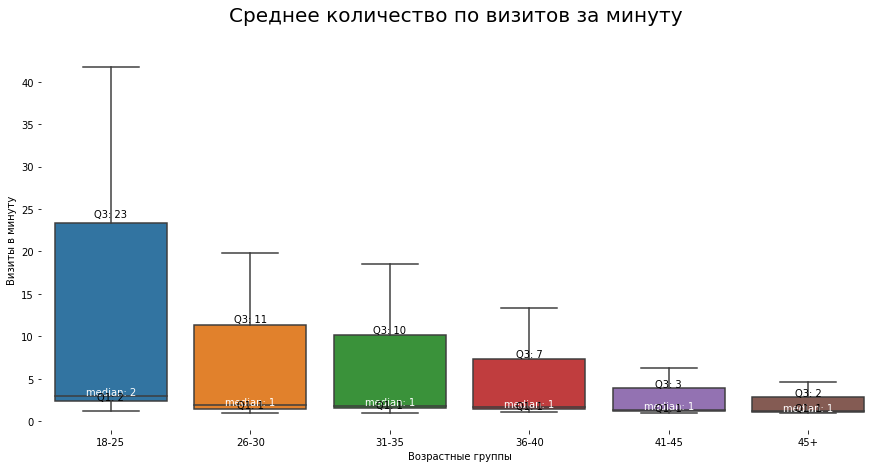

In [39]:
f, ax = plt.subplots(figsize=[15,7])
sns.despine(left=True, bottom=True, right=True)

sns.boxplot(x=cross, y=name, data=base, notch=False)
add_median(base,cross,name)  
add_quantile(base,cross,name,0.25,"Q1: ")    
add_quantile(base,cross,name,0.75,"Q3: ")  

#ax.set(ylim=(0, 300))
plt.title("Среднее количество по визитов за минуту \n", fontsize=20)
plt.ylabel("Визиты в минуту")
plt.xlabel("Возрастные группы")

# сохраним для презентации
f.savefig("1_Mean_in_Minute_ages.png")

plt.show()

In [50]:
tmp = dash_visits.pivot_table(index=['item_topic','minute'], values='visits', aggfunc='sum').reset_index()
tmp = tmp.pivot_table(index=['item_topic'], values='visits', aggfunc='mean').reset_index().sort_values('visits',
                                                                                                 ascending = False)


In [51]:
tmp.head(10)

,item_topic,visits
11,Наука,1278.588235
13,Отношения,1215.647059
6,Интересные факты,1173.058824
12,Общество,1155.294118
14,Подборки,1045.411765
19,Россия,998.000000
15,Полезные советы,907.941176
8,История,905.235294
20,Семья,699.823529
3,Женщины,676.411765


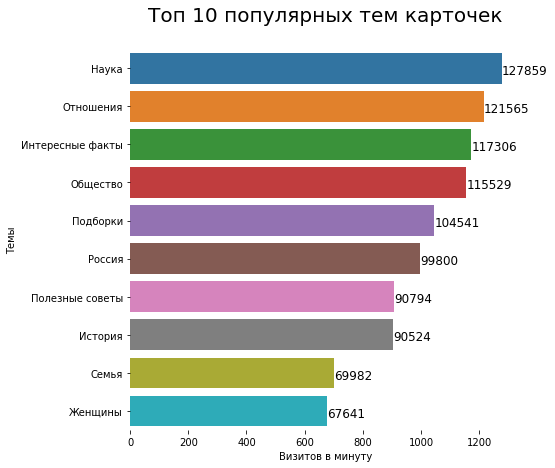

In [42]:
data = tmp.head(10)

#строим график

f, ax = plt.subplots(figsize=[7,7])
sns.despine(left=True, bottom=True, right=True)
sns.barplot(y='item_topic', x='visits', data=data)
#ax.set(ylim=(0, 0.5))

plt.title("Топ 10 популярных тем карточек\n", fontsize=20)
plt.ylabel("Темы")
plt.xlabel("Визитов в минуту")
#plt.xticks(rotation=-10)
without_hue_h(ax, data['item_topic'])


# сохраним для презентации
f.savefig("2_10_items.png")

plt.show()

* Как много карточек генерируют источники с разными темами?

In [52]:
tmp = dash_visits.pivot_table(index=['source_topic','minute'], values='visits', aggfunc='sum').reset_index()
tmp = tmp.pivot_table(index=['source_topic'], values='visits', aggfunc='mean').reset_index().sort_values('visits',
                                                                                                 ascending = False)

In [53]:
tmp.head(10)

,source_topic,visits
20,Семейные отношения,1959.352941
17,Россия,1754.764706
12,Полезные советы,1612.470588
15,Путешествия,1419.058824
5,Знаменитости,1408.529412
9,Кино,1181.411765
2,Дети,896.647059
8,История,860.470588
21,Семья,817.411765
4,Здоровье,754.764706


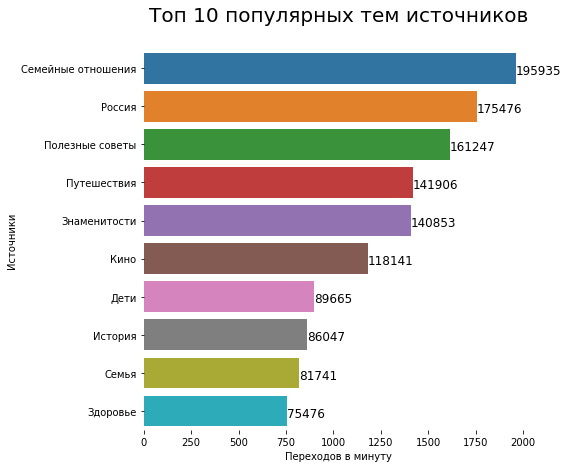

In [45]:
data = tmp.head(10)

#строим график

f, ax = plt.subplots(figsize=[7,7])
sns.despine(left=True, bottom=True, right=True)
sns.barplot(y='source_topic', x='visits', data=data)
#ax.set(ylim=(0, 0.5))

plt.title("Топ 10 популярных тем источников\n", fontsize=20)
plt.ylabel("Источники")
plt.xlabel("Переходов в минуту")
#plt.xticks(rotation=-10)
without_hue_h(ax, data['source_topic'])


# сохраним для презентации
f.savefig("3_10_sources.png")

plt.show()

* Как соотносятся темы карточек и темы источников?

In [46]:
tmp = dash_visits.pivot_table(index=['item_topic','source_topic','minute'], values='visits', aggfunc='sum').reset_index()
tmp = tmp.pivot_table(index=['source_topic','item_topic'], values='visits', aggfunc='mean').reset_index().sort_values('visits',ascending = False)


In [47]:
import plotly.express as px
fig = px.box(tmp, y="visits", points="all")
# сохраним для презентации
f.savefig("35_visits_by_.png")
fig.show()

/Users/lesia/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



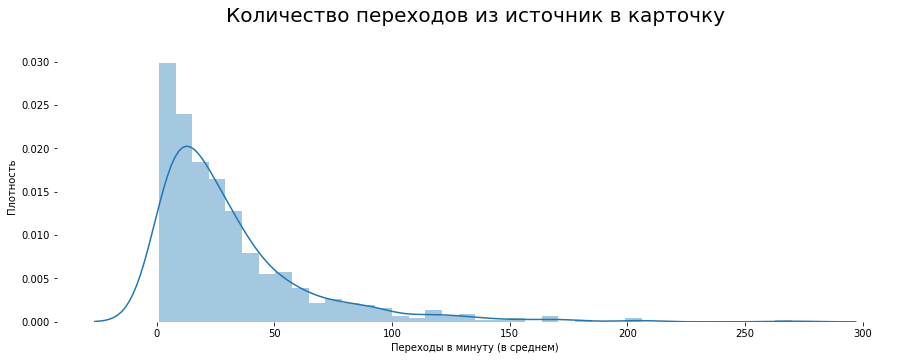

In [48]:
#строим график

f, ax = plt.subplots(figsize=[15,5])
sns.despine(left=True, bottom=True, right=True)
sns.distplot(tmp['visits'])

#ax.set(xlim=(0, 250))

plt.title("Количество переходов из источник в карточку\n", fontsize=20)
plt.xlabel("Переходы в минуту (в среднем)")
plt.ylabel("Плотность")

# сохраним для презентации
f.savefig("39_visits_by_.png")

plt.show()

In [49]:
tmp = tmp.head(10)

np.random.seed(1)

colors = n_colors('rgb(8, 81, 156)', 'rgb(107, 174, 214)', 10, colortype='rgb')

a = np.random.randint(low=0, high=9, size=10)
b = np.random.randint(low=0, high=9, size=10)
c = np.random.randint(low=0, high=9, size=10)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['Тема источника','Тема карточки','Визитов в минуту в среднем'],
    line_color='white', fill_color='white',
    align='center',font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[tmp['item_topic'], tmp['source_topic'], tmp['visits'].round(0)],
    line_color=[colors],
    fill_color=[colors],
    align='center', font=dict(color='white', size=11)
    ))
])

# сохраним для презентации
f.savefig("4_table.png")

fig.show()